In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../Datasets/Titanic/train.csv')
df=df[["Sex","Age","Fare"]]
df["Age"]=df["Age"].apply(lambda x: x if x>0 else df["Age"].median())
df["Sex"]=df["Sex"].map({'male':-1,'female':1,-1:-1,1:1})
df.head(10)

,Sex,Age,Fare
0,-1,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,-1,35.0,8.0500
5,-1,28.0,8.4583
6,-1,54.0,51.8625
7,-1,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [3]:
df_test = pd.read_csv('../Datasets/Titanic/test.csv')
df_test=df_test[["Sex","Age","Fare"]]
df_test["Age"]=df_test["Age"].apply(lambda x: x if x>0 else df_test["Age"].median())
df_test["Sex"]=df_test["Sex"].map({'male':-1,'female':1,-1:-1,1:1})
df_test["Fare"]=df_test["Fare"].apply(lambda x: x if x>0 else df_test["Fare"].mean())
df_test.head(10)

,Sex,Age,Fare
0,-1,34.5,7.8292
1,1,47.0,7.0000
2,-1,62.0,9.6875
3,-1,27.0,8.6625
4,1,22.0,12.2875
5,-1,14.0,9.2250
6,1,30.0,7.6292
7,-1,26.0,29.0000
8,1,18.0,7.2292
9,-1,21.0,24.1500


In [4]:
x_train = df[["Sex","Fare"]]
y_train = df["Age"]
x_test = df_test[["Sex","Fare"]]
y_test = df_test["Age"]

In [5]:
model = RandomForestRegressor(n_estimators = 500)

model.fit(x_train,y_train)

y_predict = model.predict(x_test)

In [6]:
Y=y_test.to_numpy()-y_predict
print("Mean Squared Error: ",sum(np.square(Y))/len(Y))

Mean Squared Error:  170.26944594124106


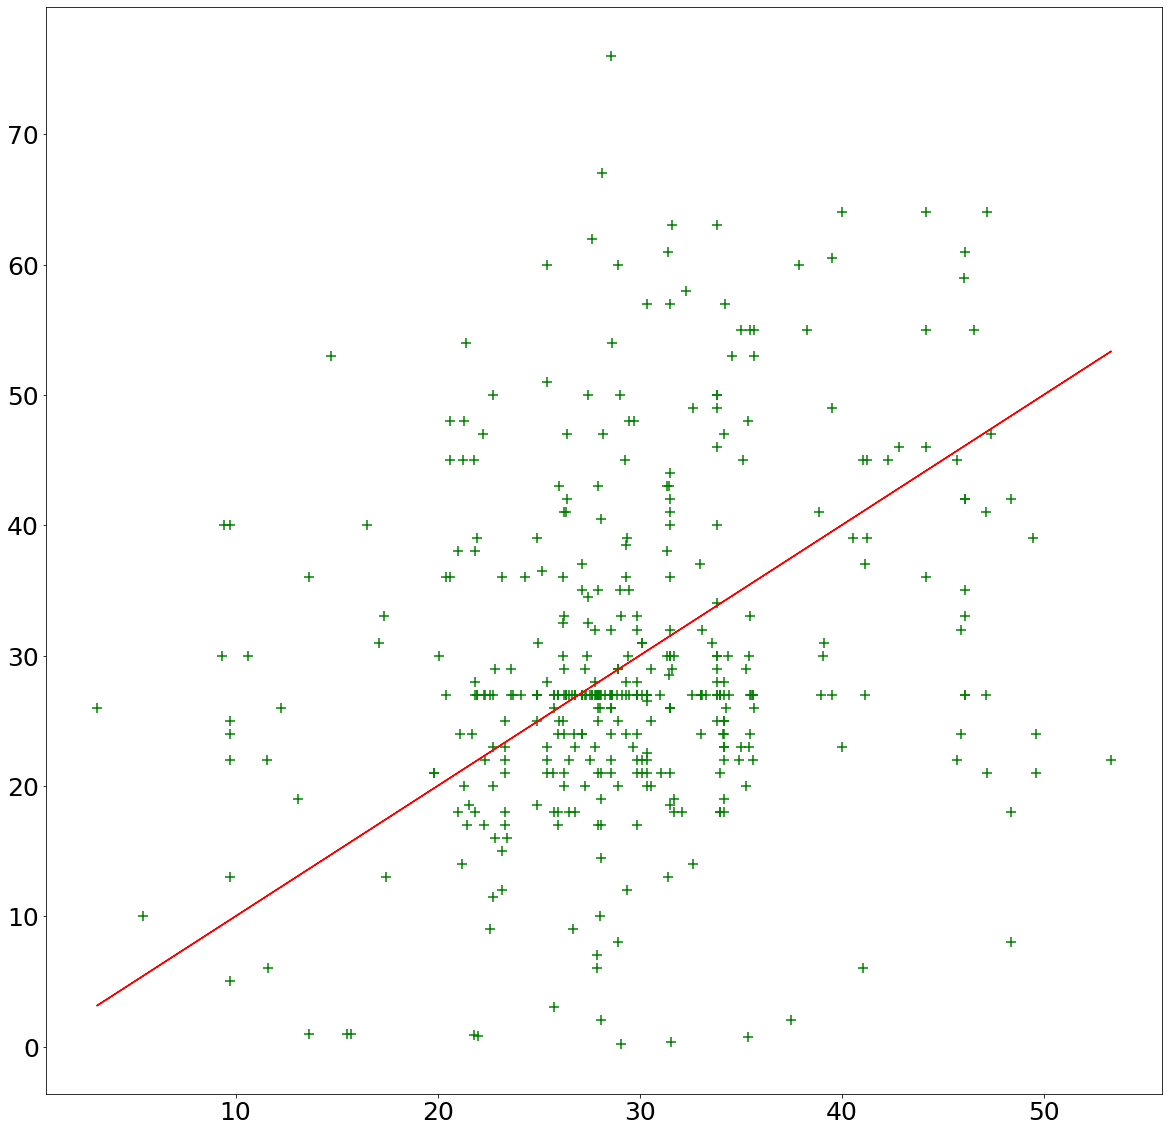

In [7]:
fig, axes = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)

axes.tick_params(axis='y', which='major', labelsize=25)
axes.tick_params(axis='x', which='major', labelsize=25)

axes.scatter(y_predict,y_test,color='Green',marker="+",s=100)
axes.plot(y_predict,y_predict,color='Red')

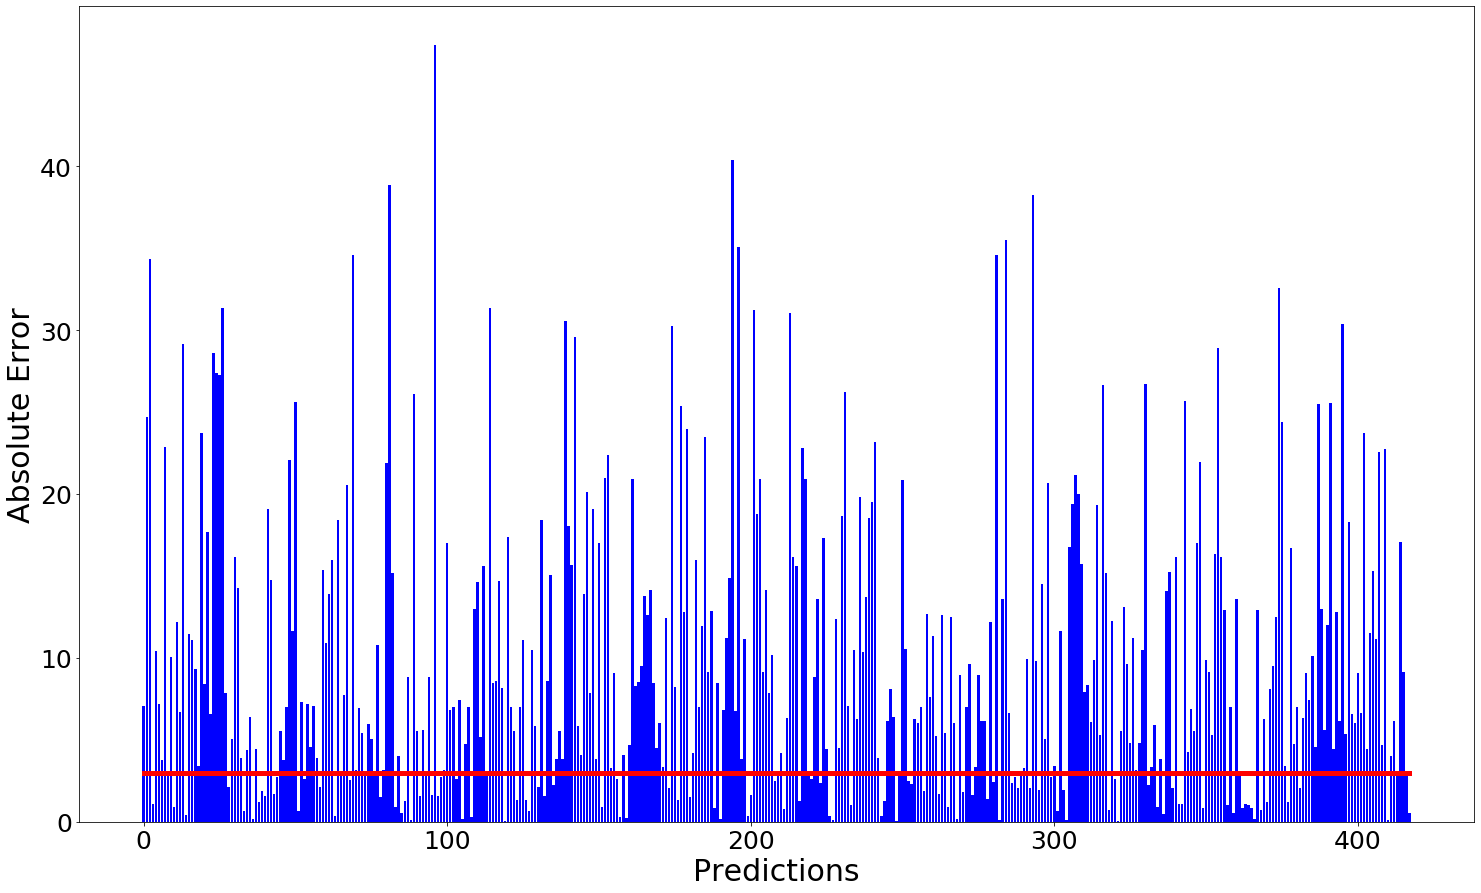

In [8]:
fig, axes = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(25)

axes.set_xlabel(xlabel="Predictions",fontsize = 30)
axes.set_ylabel(ylabel="Absolute Error",fontsize = 30)
axes.tick_params(axis='y', which='major', labelsize=25)
axes.tick_params(axis='x', which='major', labelsize=25)

axes.bar(range(0,len(Y)),np.absolute(Y),color='Blue')
maxAgeAcceptable=3
axes.plot([0,len(Y)-1],[maxAgeAcceptable,maxAgeAcceptable],color='Red',linewidth=5)